In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/darnellkikoo/Dautomation/main/Datasets/Churn_Modelling_Raw.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['ExitLabel'] = df['Exited'].apply(lambda x: 'Churn' if x == 1 else 'Not Churn')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitLabel,Age_label
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn,Above 40
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Not Churn,Above 40
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn,Above 40
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Not Churn,Below 40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Not Churn,Above 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Not Churn,Below 40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Not Churn,Below 40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Churn,Below 40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Churn,Above 40


In [ ]:
df_new = df.copy()
df_new_gender=df_new.groupby(['Gender', 'ExitLabel']).sum().reset_index()
df_new_gender

,Gender,ExitLabel,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Female,Churn,5493875,17869500283,736800,51010,5619,1.014127e+08,1721,795,414,1.172589e+08,1139
1,Female,Not Churn,16961854,53415388676,2219927,127250,16942,2.423078e+08,5294,2397,1870,3.397739e+08,0
2,Male,Churn,4499479,14091135569,577781,40325,4429,8.417536e+07,1284,629,321,8.942669e+07,898
3,Male,Not Churn,23049792,71533381166,2970780,170633,23138,3.369630e+08,7003,3234,2546,4.544429e+08,0


# Numerikal terhadap Target

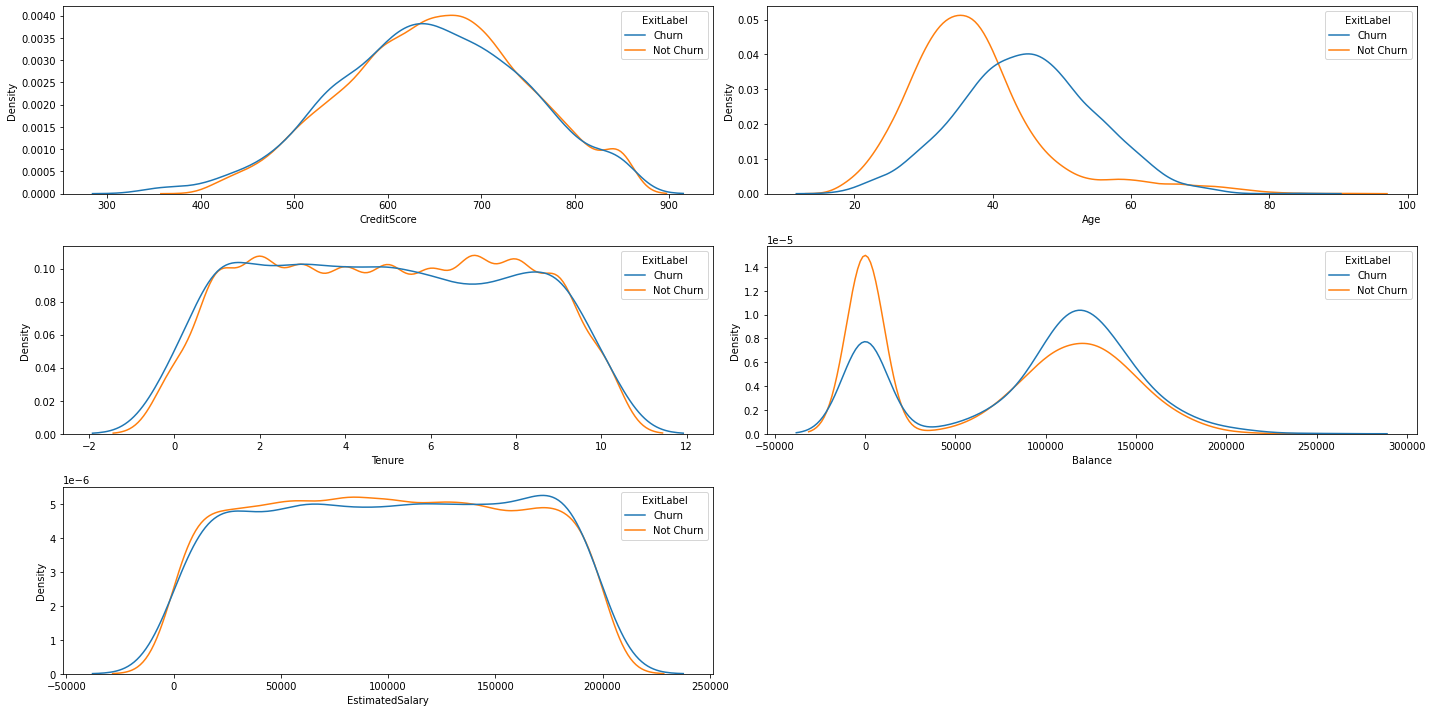

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['CreditScore', 'Age', 'Tenure', 'Balance',  'EstimatedSalary']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = columns[i] , hue = 'ExitLabel', data = df, common_norm = False)
    plt.tight_layout()

Dari charts di atas, dapat disimpulkan beberapa hal sebagai berikut:
- Secara keseluruhan terlihat bahwa jumlah customer churn lebih sedikit dari yang non churn. Ini memvalidasi hasil analisis sebelumnya yang menunjukan bahwa rasio customer not churn dan churn adalah 80:20
- Untuk 'CreditScore' yang bisa kami highlight adalah sebagian besar customer (churn dan not churn) merupakan customer dengan CreditScore antara 500 - 800. Ini yang perlu diperhatikan oleh Tim terkait (Marketing, Sales, dan Customer Care) dibandingkan dengan customer2 dengan CreditScore di luar itu. 
- Untuk 'Tenure' customers (churn dan not churn) dengan Tenure antara 1-9 perlu diberikan treatment lebih banyak/special mengingat jumlahnya yang mendominasi 
- Untuk 'EstimatedSalary' customer2 yang sangat penting untuk diperhatikan adalah mereka dengan EstimatedSalary diantara 10,000 - 190,000
- Fitur 'Age' cukup unik dibandingkan dengan fitur2 lainnya. Hal ini karena terdapat range umur dimana jumlah customer churn lebih banyak dari not churn, yaitu umur 50-59 tahun. Ini sangat perlu untuk diberikan treatment oleh tim2 terkait (Marketing, Sales, dan Customer Care/Engagement) untuk memastikan jumlah customer churn bisa ditekan/diminimisasi. Customer dengan umur 25-30 adalah range umur dimana jumlah customer not churn paling banyak/mendominasi. Customer2 ini juga perlu dimaintain supaya retention rate mereka bisa terjaga.
*   Untuk 'Balance' dapat dilihat bahwa tingkat terjadinya Churn tertinggi berada diantara balance 0 dan kurang lebih 125000 sehingga menjadi hal yang penting untuk diperhatikan





# Kategori terhadap target

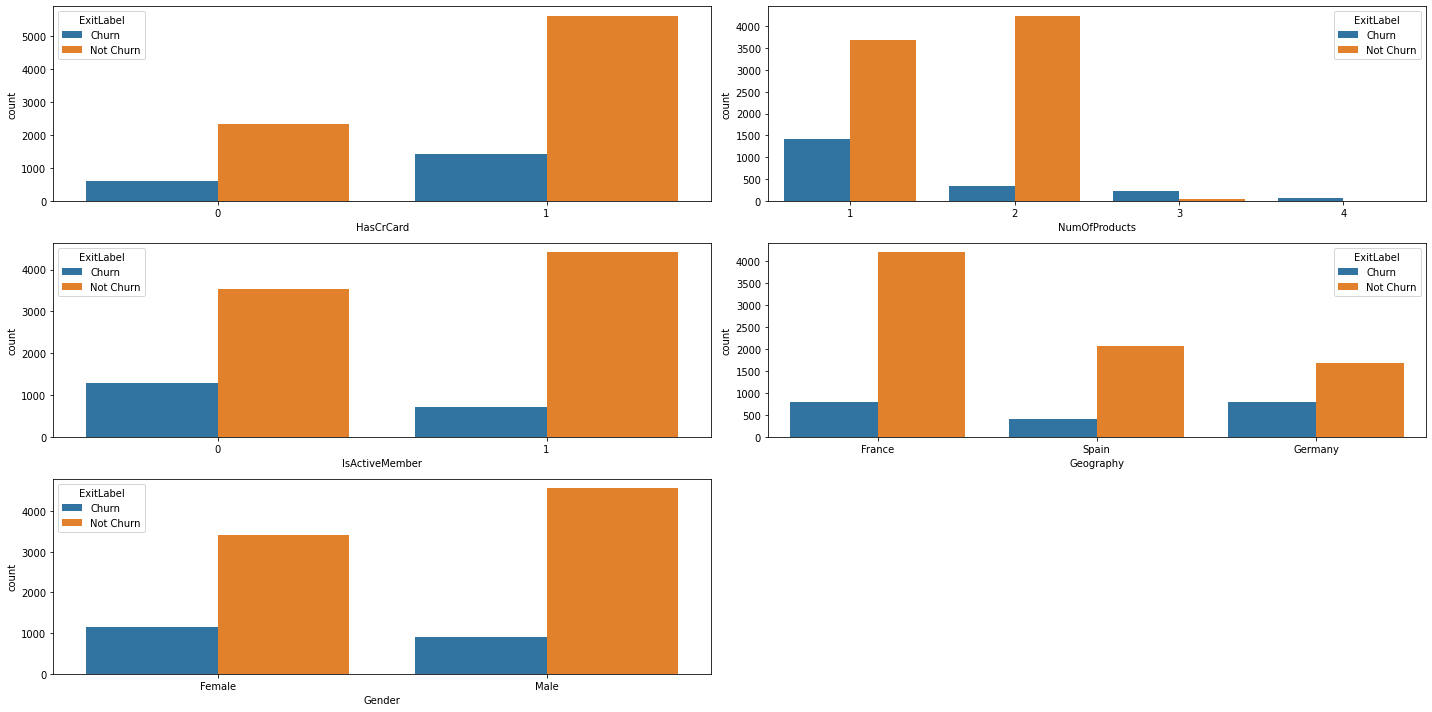

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts', 'IsActiveMember', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = columns[i] , hue = 'ExitLabel', data = df)
    plt.tight_layout()

- Negara `Germany` memiliki churn rate paling tinggi dibandingkan negara lain. Negara ini perlu diberikan treatment lebih khusus dibandingkan dengan kedua negara lainnya
- Nasabah yang memiliki status `tidak aktif` memiliki kemungkinan lebih tinggi untuk menjadi `Churn`
- Customer yang memiliki credit Card lebih banyak melakukan churn
- Khusus untuk `NumOfProducts`, orang yang memiliki produk lebih dari 3 memiliki rasio churn di atas 50%, dan semakin banyak produk yang mereka miliki, semakin kecil kemungkinan untuk churn
- Female customer cenderung churn dibandingkan dengan Male customer


# Kategori terhadap kategori

## Terhadap Status Aktif

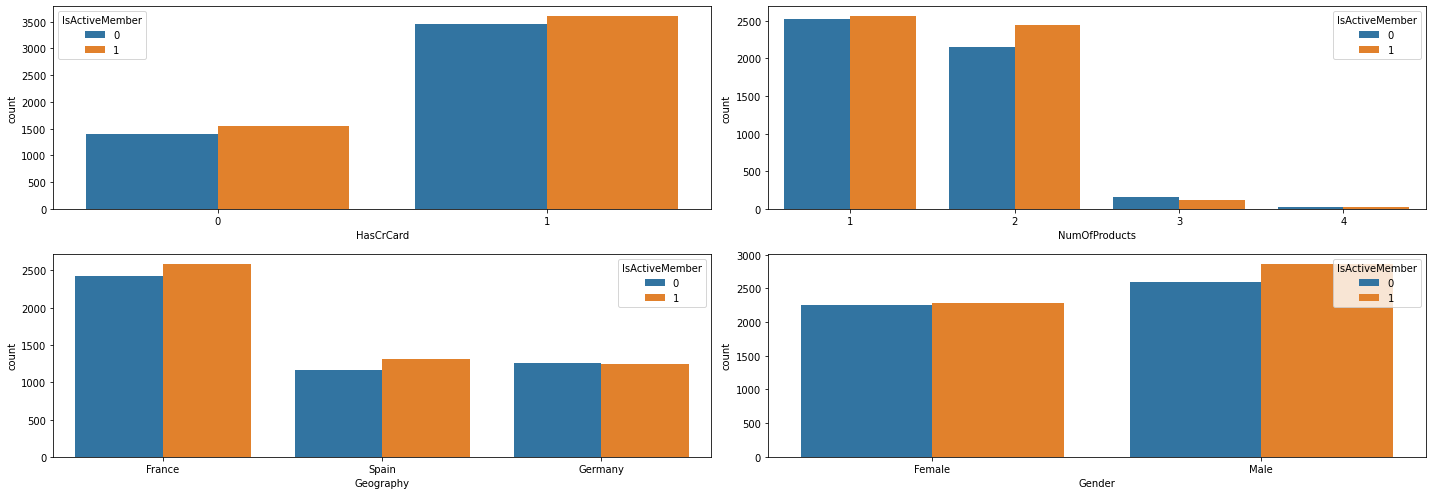

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = columns[i] , hue = 'IsActiveMember', data = df)
    plt.tight_layout()

# Terhadap Geography

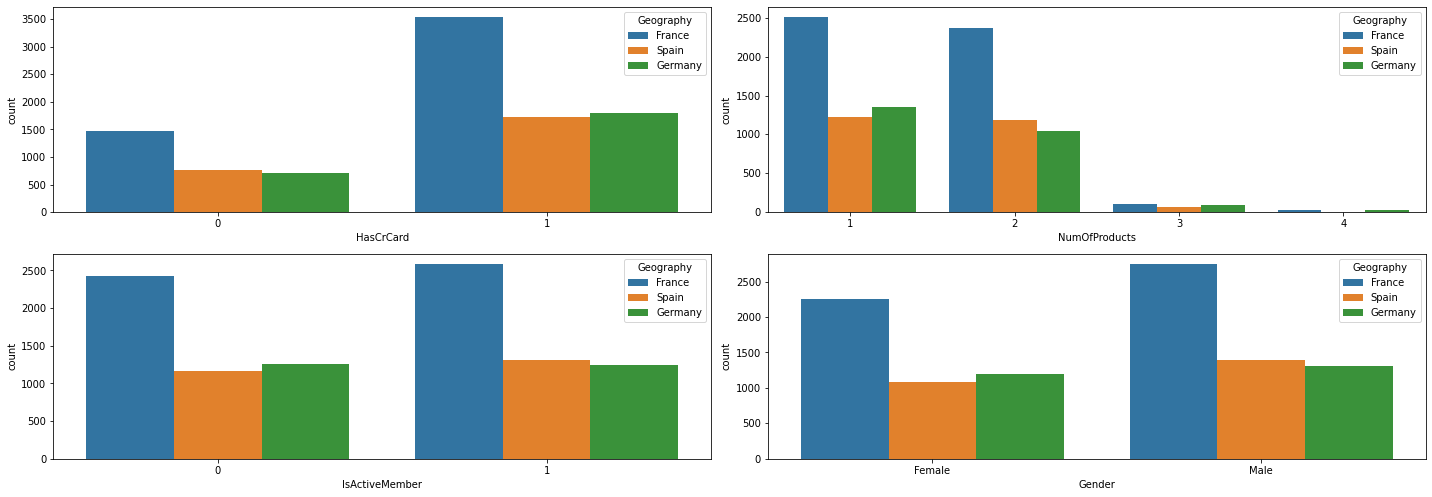

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = columns[i] , hue = 'Geography', data = df)
    plt.tight_layout()

## Terhadap Gender

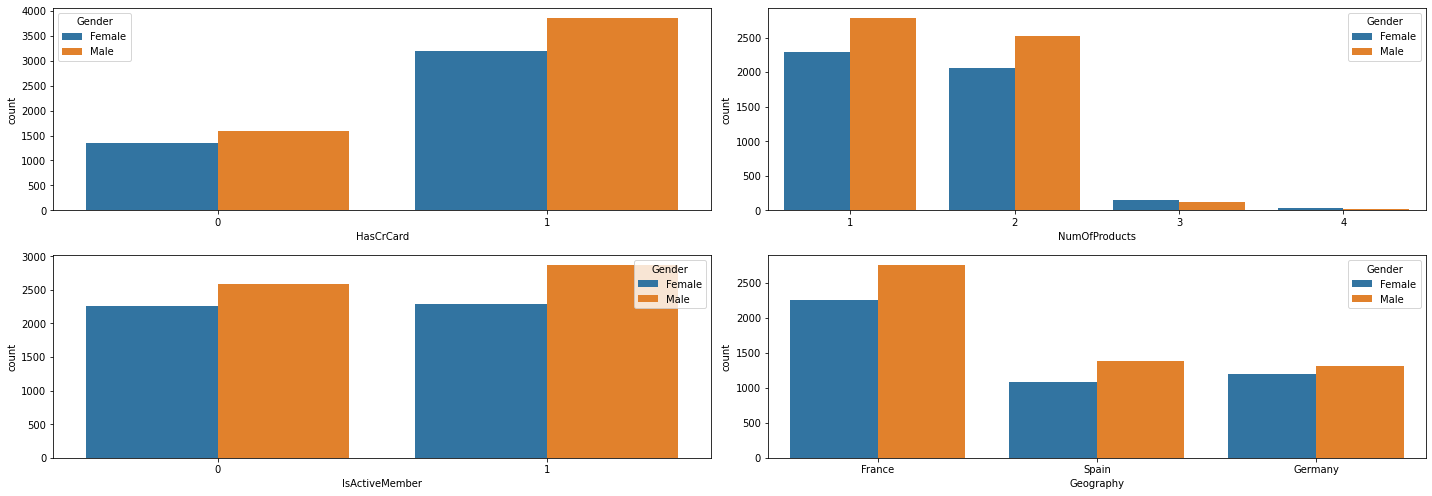

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Geography']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = columns[i] , hue = 'Gender', data = df)
    plt.tight_layout()

## Tergantung Kategori

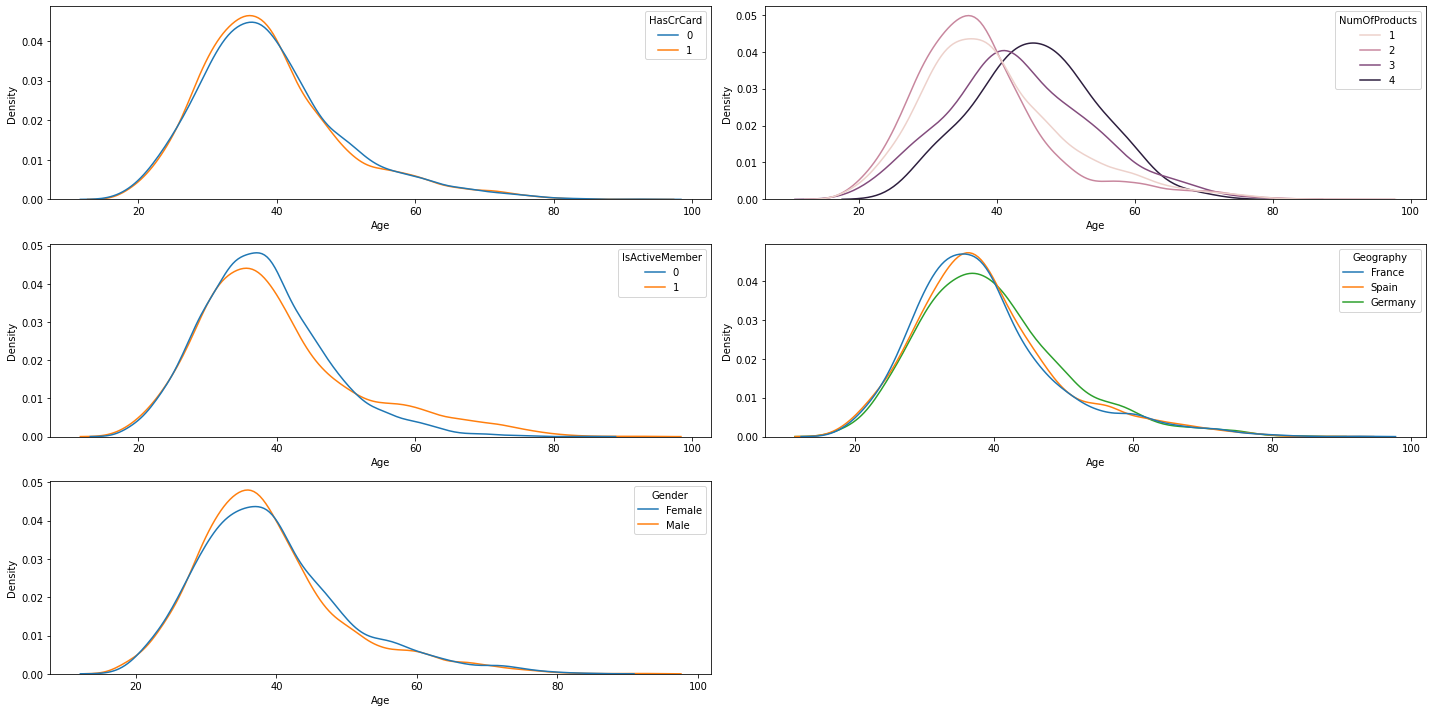

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = 'Age' , hue = columns[i], data = df, common_norm=False)
    plt.tight_layout()

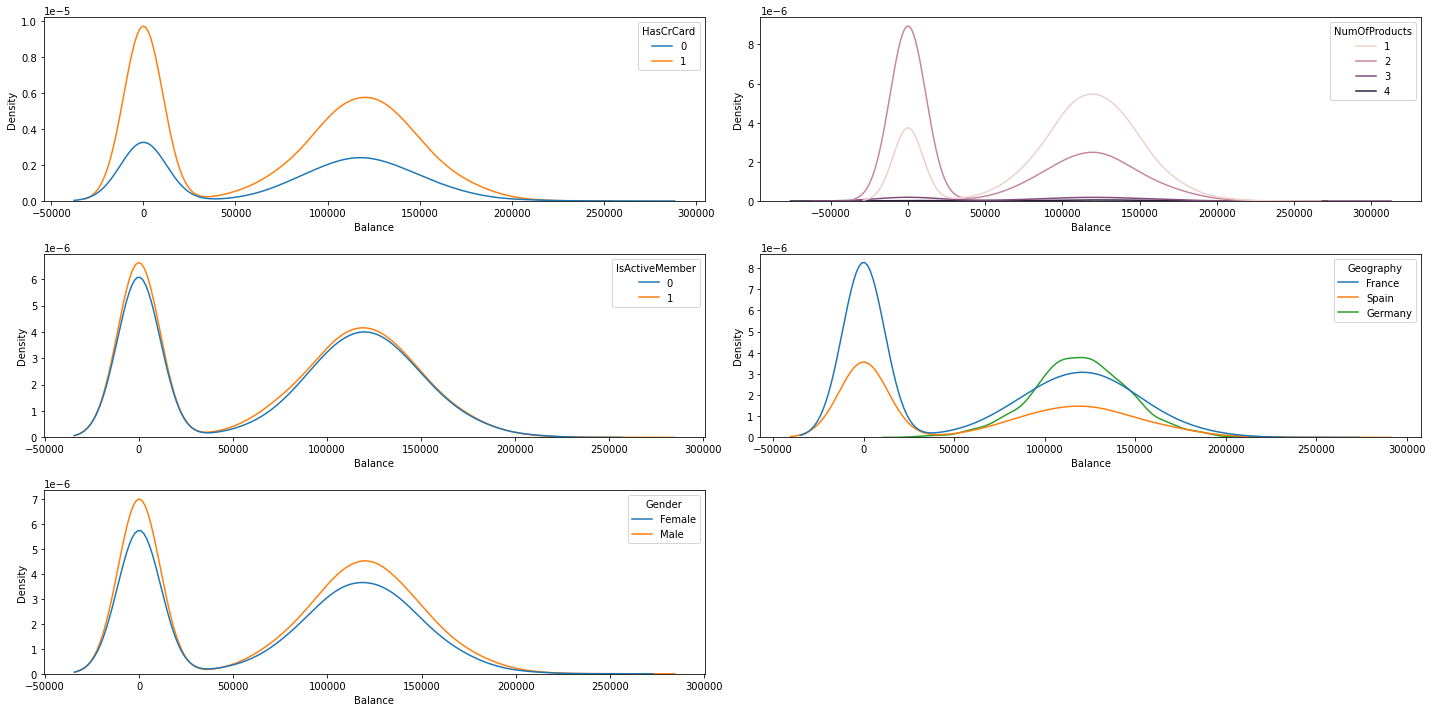

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = 'Balance' , hue = columns[i], data = df)
    plt.tight_layout()

- Customer kewarganegaraan German tidak ada yang memiliki balance 0, sedangkan untuk negara France dan Spain, customernya slalu memiliki balance 0 lebih tinggi daripada yang lain

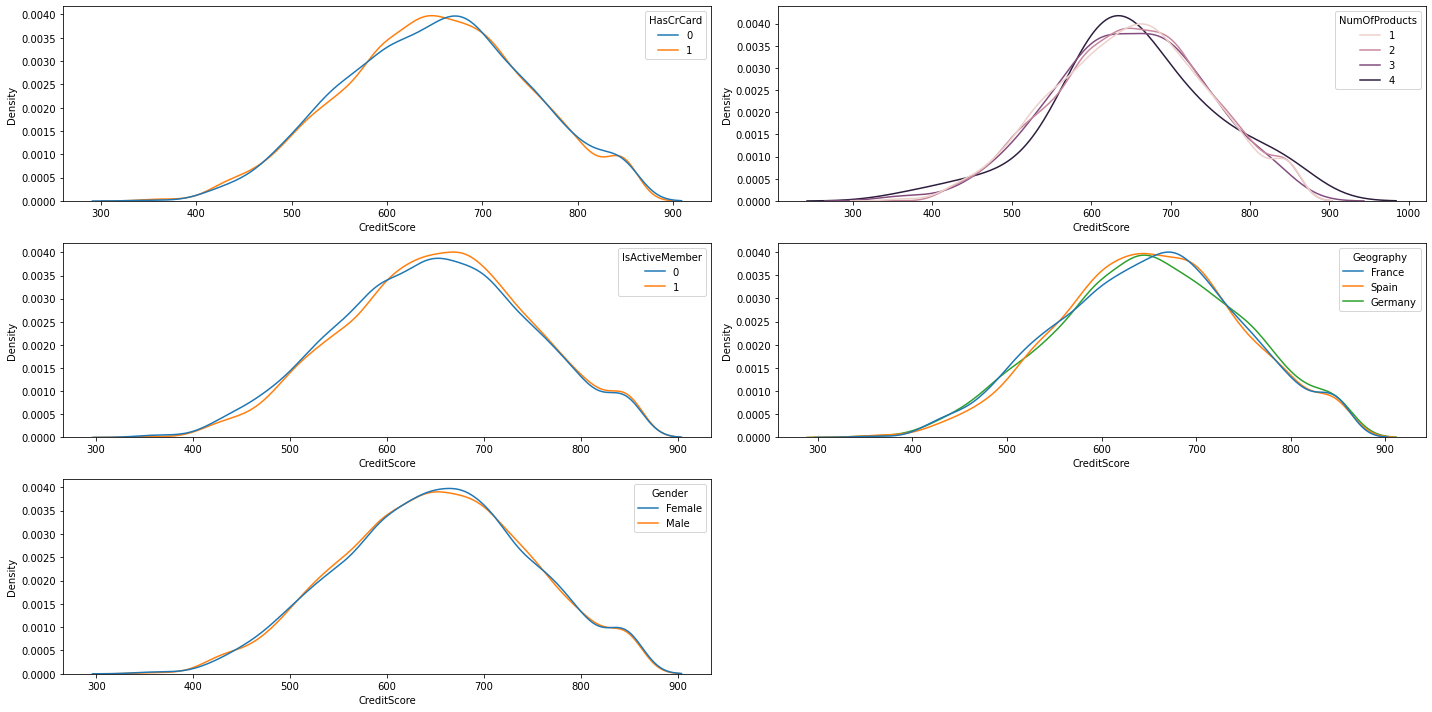

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = 'CreditScore' , hue = columns[i], data = df, common_norm = False)
    plt.tight_layout()

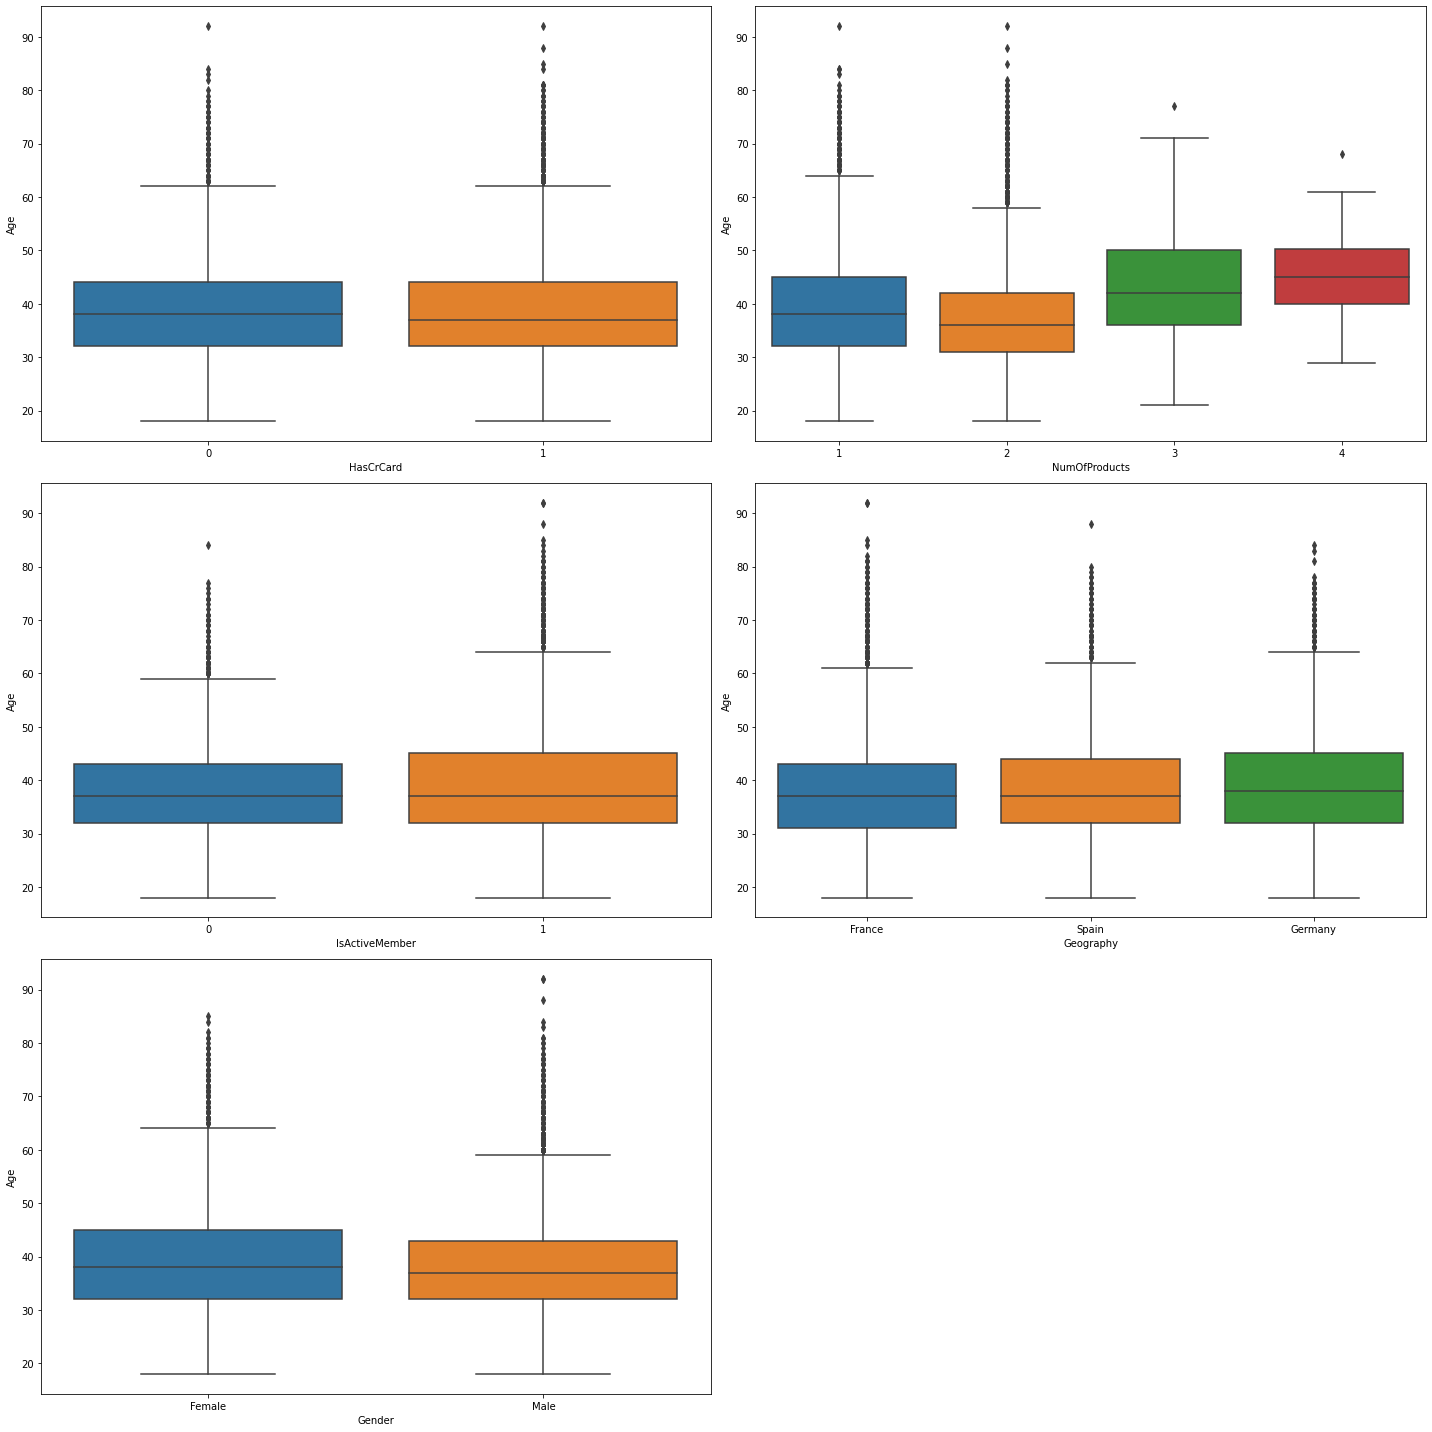

In [ ]:
plt.figure(figsize = (20, 20))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y = 'Age' , x = columns[i], data = df)
    plt.tight_layout()

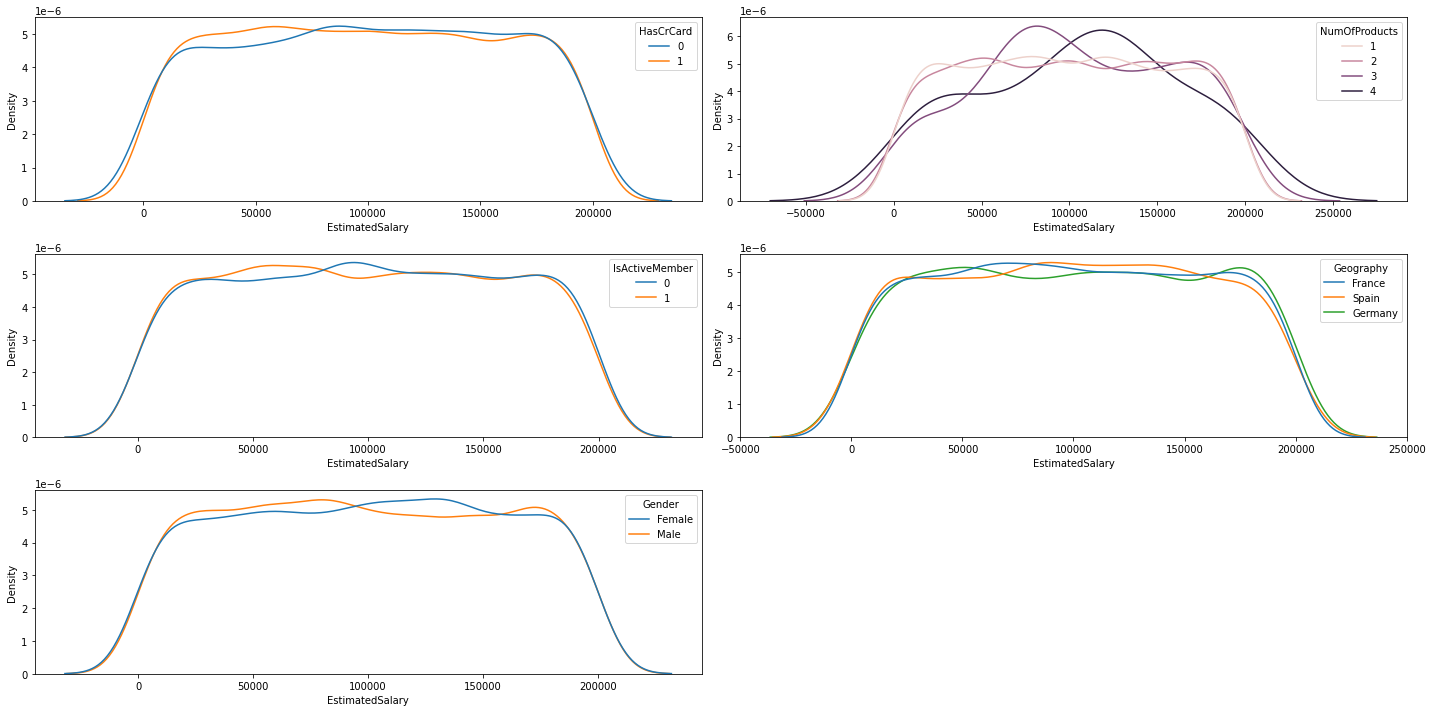

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['HasCrCard','NumOfProducts','IsActiveMember', 'Geography', 'Gender']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x = 'EstimatedSalary' , hue = columns[i], data = df, common_norm = False)
    plt.tight_layout()

- Perhatikan Balance terhadap geography

# Numerikal terhadap numerikal

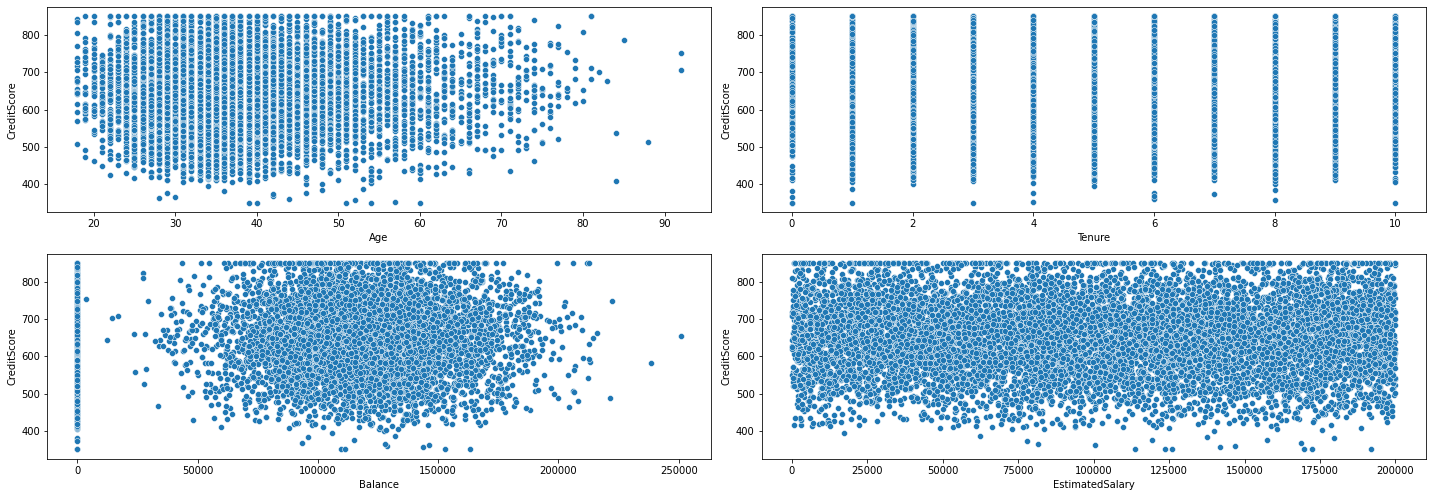

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['Age', 'Tenure', 'Balance',  'EstimatedSalary']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x = columns[i], y = 'CreditScore', data = df)
    plt.tight_layout()

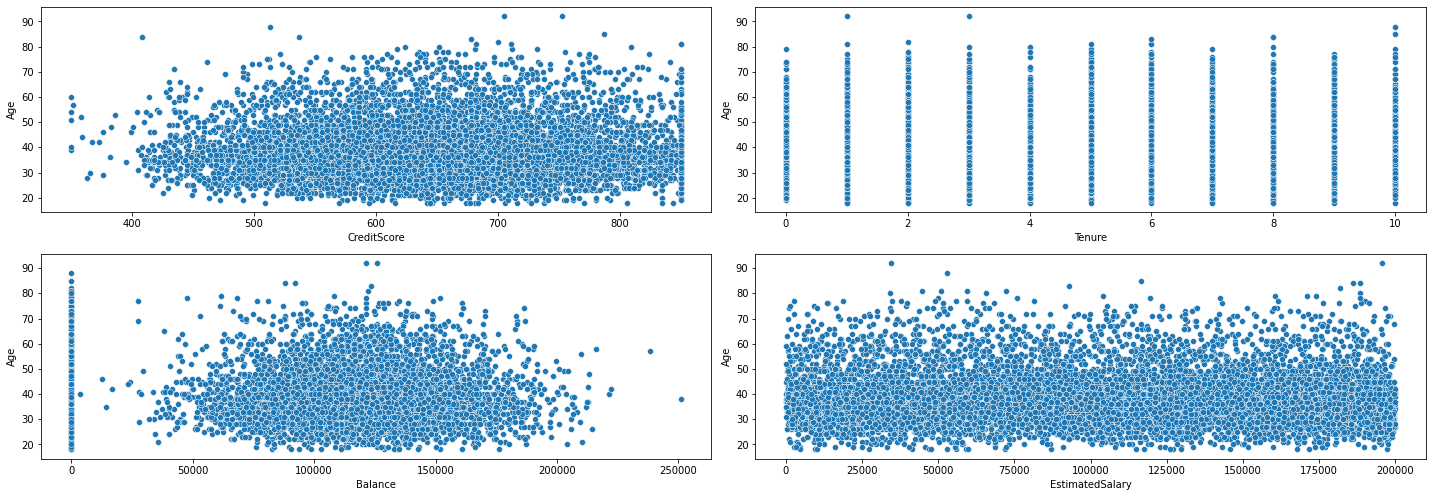

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['CreditScore', 'Tenure', 'Balance',  'EstimatedSalary']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x = columns[i] , y = 'Age', data = df)
    plt.tight_layout()

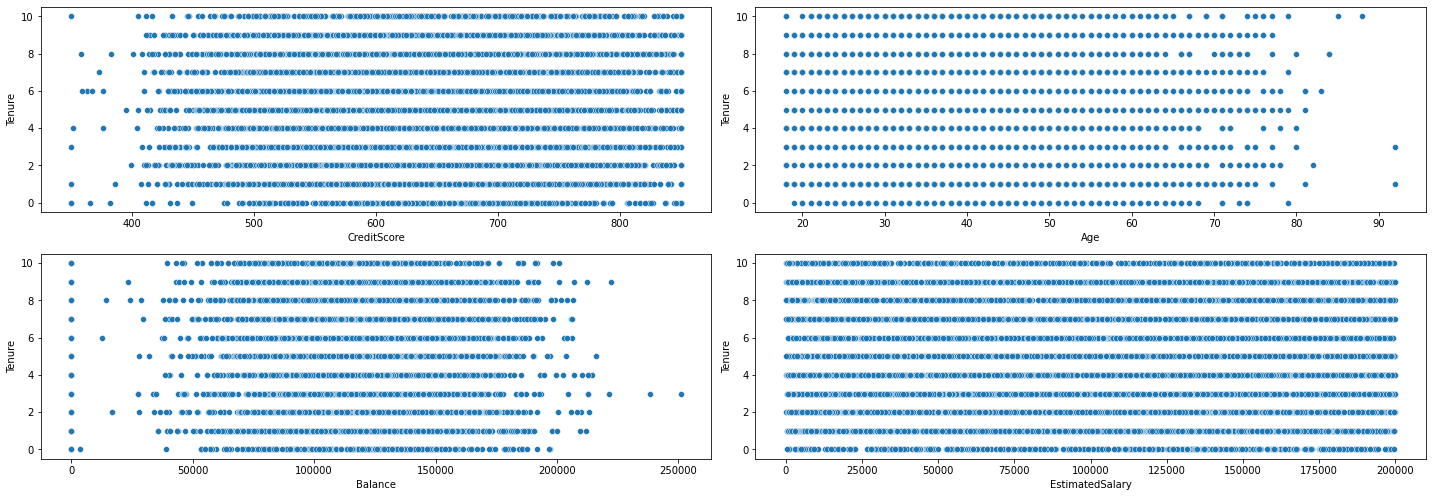

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['CreditScore', 'Age', 'Balance',  'EstimatedSalary']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x = columns[i] , y = 'Tenure', data = df)
    plt.tight_layout()

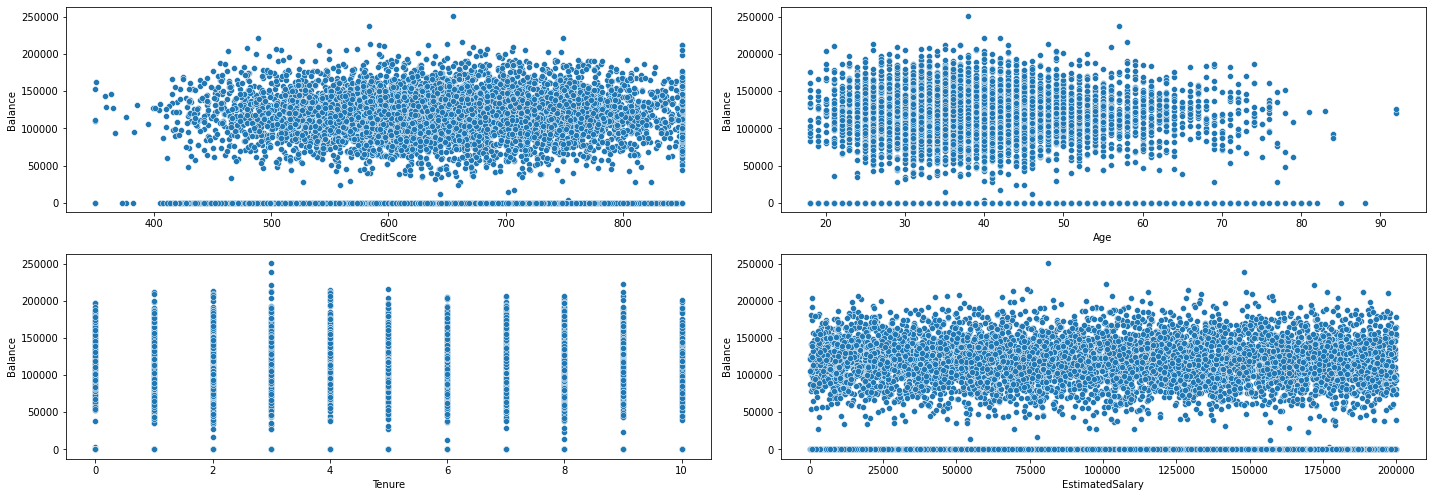

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['CreditScore', 'Age', 'Tenure',  'EstimatedSalary']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x = columns[i] , y = 'Balance', data = df)
    plt.tight_layout()

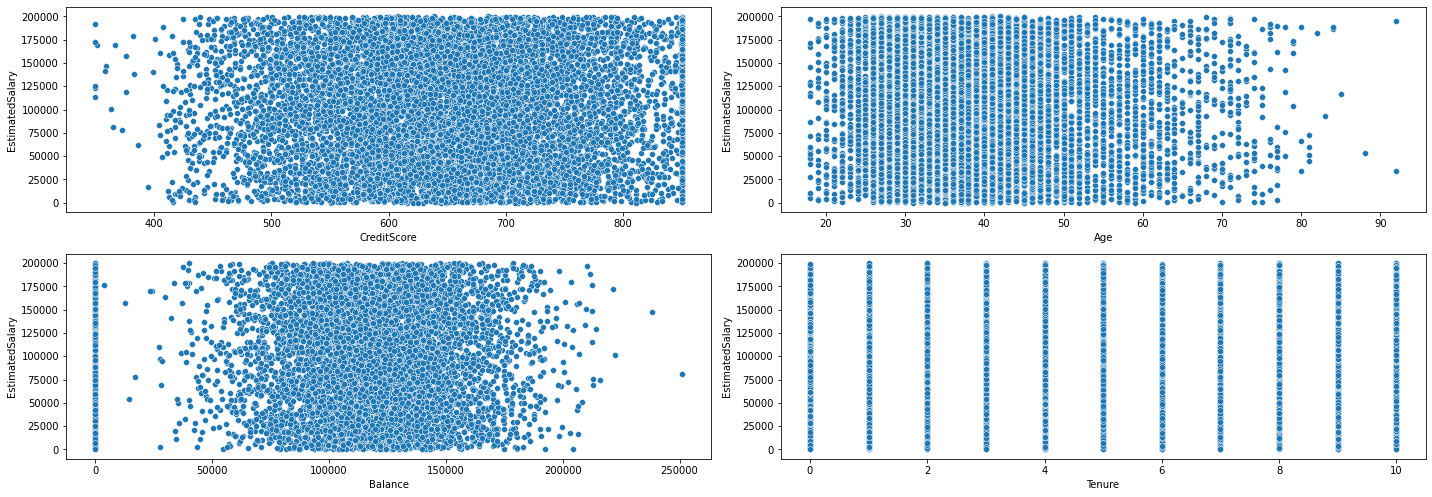

In [ ]:
plt.figure(figsize = (20, 10))
columns = ['CreditScore', 'Age', 'Balance', 'Tenure']
for i in range(0, len(columns)):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x = columns[i] , y = 'EstimatedSalary', data = df)
    plt.tight_layout()

In [ ]:
# 'CreditScore', 'Age', 'Tenure', 'Balance',  'EstimatedSalary'
# 'HasCrCard','NumOfProducts', 'IsActiveMember', 'Geography', 'Gender'
df['Age_label'] = np.where(df['Age'] > 40, 'Above 40', 'Below 40')
df_temp = df.groupby(['Gender', 'Geography', 'Age_label', 'ExitLabel'])['CustomerId'].count().reset_index()
df_temp['total'] = df_temp.groupby(['Gender', 'Geography', 'Age_label'])['CustomerId'].transform('sum')
df_temp['churn_rate'] = df_temp['CustomerId'] / df_temp['total']
df_temp.loc[(df_temp['ExitLabel'] == 'Churn')]

,Gender,Geography,Age_label,ExitLabel,CustomerId,total,churn_rate
0,Female,France,Above 40,Churn,302,781,0.386684
2,Female,France,Below 40,Churn,158,1480,0.106757
4,Female,Germany,Above 40,Churn,295,512,0.576172
6,Female,Germany,Below 40,Churn,153,681,0.224670
8,Female,Spain,Above 40,Churn,150,411,0.364964
10,Female,Spain,Below 40,Churn,81,678,0.119469
12,Male,France,Above 40,Churn,237,884,0.268100
14,Male,France,Below 40,Churn,113,1869,0.060460
16,Male,Germany,Above 40,Churn,249,522,0.477011
18,Male,Germany,Below 40,Churn,117,794,0.147355
